In [13]:
# all imports go at the top of the notebook
import urllib
from IPython.display import Image
from IPython.display import HTML
from IPython.display import display
import os
import shutil
from scipy.misc import imread
from matplotlib import pylab as plt
%matplotlib inline

In [42]:
# make the inputs, temp, and outputs directory if it does not exist
if not os.path.exists("inputs"):
    os.mkdir("inputs")

# remove the old output directory (if there)
if os.path.exists("temp"):
    shutil.rmtree("temp")
# make a new outputs directory
os.mkdir("temp")

# remove the old output directory (if there)
if os.path.exists("outputs"):
    shutil.rmtree("outputs")
# make a new outputs directory
os.mkdir("outputs")


In [9]:
# this is a cat clipart image
remote_file = "http://cliparting.com/wp-content/uploads/2016/05/Cat-clipart-6-2.png"
input_file = "inputs/cat.jpg"
urllib.urlretrieve(remote_file, input_file)
!identify {input_file}

inputs/cat.jpg PNG 555x675 555x675+0+0 8-bit sRGB 228KB 0.000u 0:00.009


In [36]:
def show_versions(images, captions=None):
    num_images = len(images)
    plt_height = 3
    plt_width = plt_height * num_images
    plt.figure(figsize=(plt_width, plt_height))
    for i,f in enumerate(images):
        plt.subplot(1,num_images+1,1+i)
        plt.imshow(imread(f))
        plt.axis('off')
        if captions is not None:
            plt.title(captions[i])

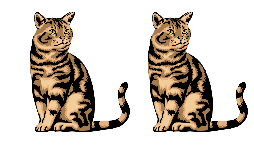

In [38]:
show_versions([input_file, input_file])

In [41]:
temp_file = "temp/crop1.png"
command = "convert {} -crop 440x220+0+0 {}".format(input_file, temp_file)
!{command}

convert: unable to open image `temp/crop1.png': No such file or directory @ error/blob.c/OpenBlob/2702.
convert: WriteBlob Failed `temp/crop1.png' @ error/png.c/MagickPNGErrorHandler/1630.
